# Lab1 - STAT214

Xuanlin Mao 3040748116

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import UnivariateSpline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df0 = pd.read_csv('../data/TBI PUD 10-08-2013.csv')
df0.head(3)

,PatNum,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,...,Finding20,Finding21,Finding22,Finding23,DeathTBI,HospHead,HospHeadPosCT,Intub24Head,Neurosurgery,PosIntFinal
0,1,3.0,3,11.0,2.0,0.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
1,2,5.0,3,8.0,2.0,0.0,0.0,92.0,0.0,92.0,...,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
2,3,5.0,3,5.0,2.0,NaN,NaN,92.0,NaN,92.0,...,0,0,0,0,0.0,1.0,0,0.0,0.0,0.0


---

EDA

In [3]:
df0

,PatNum,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,...,Finding20,Finding21,Finding22,Finding23,DeathTBI,HospHead,HospHeadPosCT,Intub24Head,Neurosurgery,PosIntFinal
0,1,3.0,3,11.0,2.0,0.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
1,2,5.0,3,8.0,2.0,0.0,0.0,92.0,0.0,92.0,...,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
2,3,5.0,3,5.0,2.0,NaN,NaN,92.0,NaN,92.0,...,0,0,0,0,0.0,1.0,0,0.0,0.0,0.0
3,4,5.0,3,6.0,1.0,91.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
4,5,3.0,3,12.0,2.0,91.0,0.0,92.0,0.0,92.0,...,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43394,43395,5.0,3,8.0,2.0,0.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
43395,43396,5.0,3,6.0,1.0,91.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
43396,43397,5.0,3,7.0,1.0,0.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
43397,43398,5.0,1,8.0,2.0,0.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0


In [4]:
df0.InjuryMech.value_counts().sort_index()

InjuryMech
1.0      3910
2.0      1433
3.0       556
4.0      1701
5.0       901
6.0      4733
7.0      2455
8.0     11883
9.0      2908
10.0     2979
11.0     3016
12.0     3158
90.0     3465
Name: count, dtype: int64

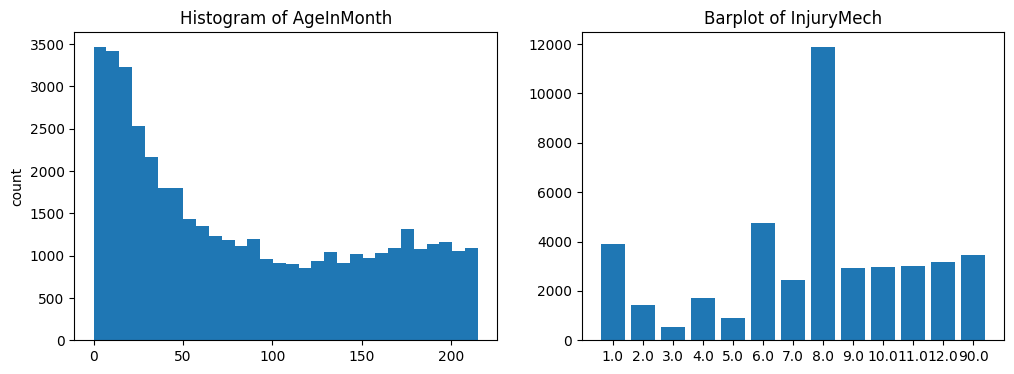

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(df0.AgeInMonth,bins=30)
axes[0].set_ylabel('count')
axes[0].set_title('Histogram of AgeInMonth')
axes[1].bar(x=df0.InjuryMech.value_counts().sort_index().index.astype(str), height=df0.InjuryMech.value_counts().sort_index())
axes[1].set_title('Barplot of InjuryMech')
plt.savefig("../saved/hist_numeric.pdf", format="pdf", bbox_inches="tight")
plt.show()

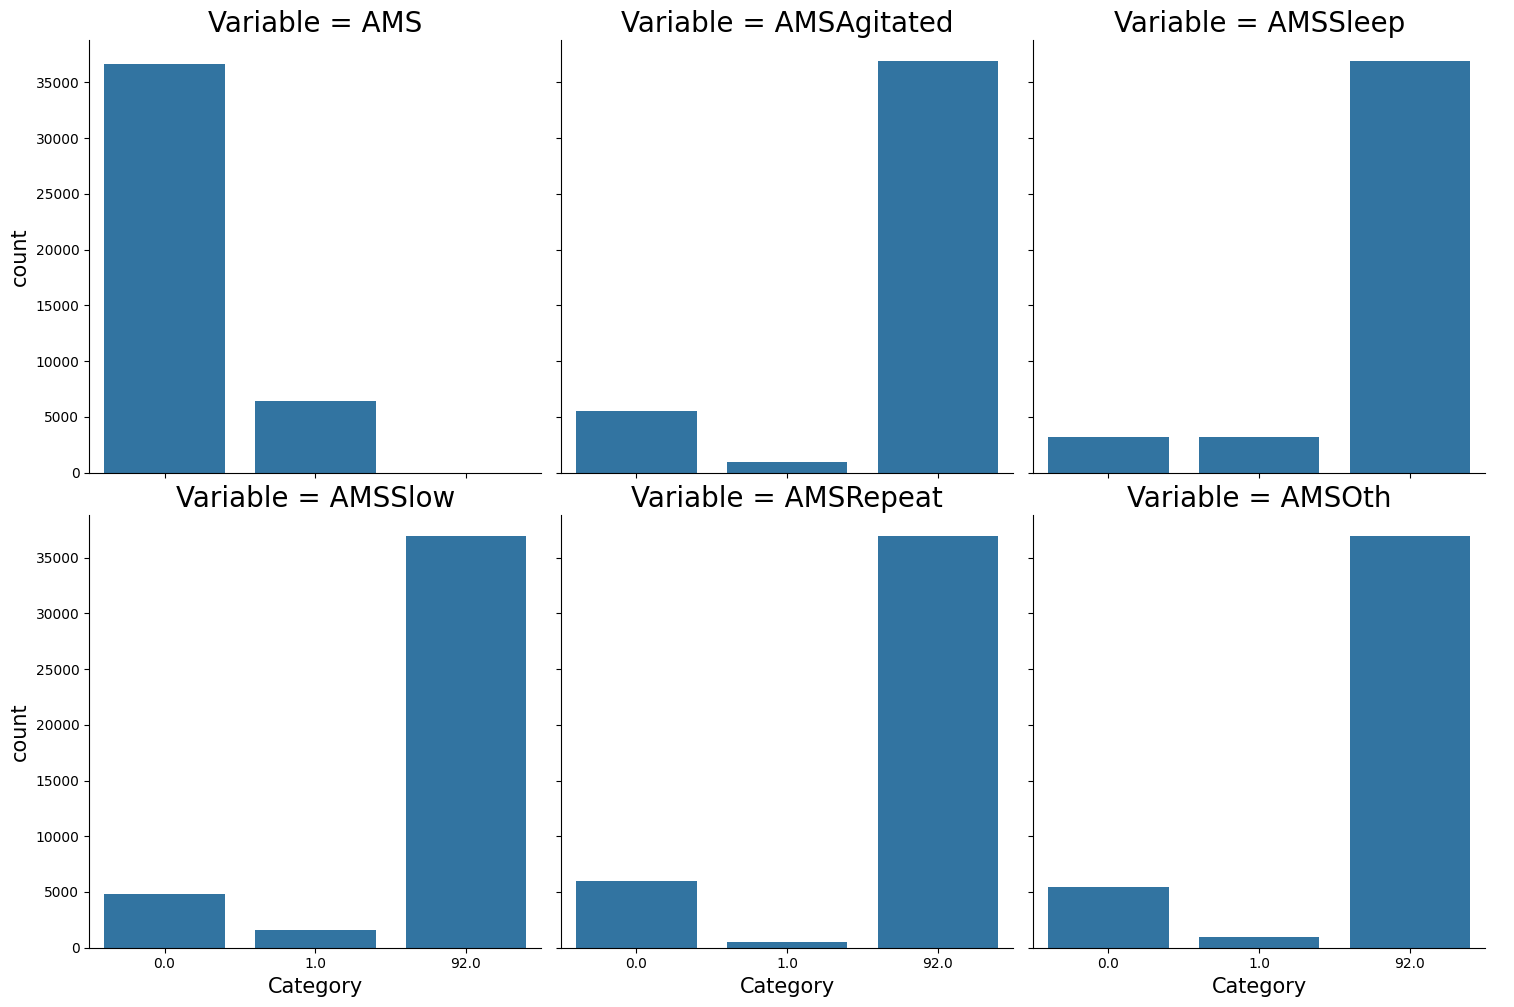

In [6]:
g = sns.catplot(data=df0[['AMS','AMSAgitated','AMSSleep','AMSSlow','AMSRepeat','AMSOth']].melt(var_name="Variable", value_name="Category"), 
                x="Category", col="Variable", kind="count", col_wrap=3)
g.set_titles(size=20)
g.set_xlabels(size=15)
g.set_ylabels(size=15)
# plt.suptitle('Barplot of AMS variables')
plt.savefig("../saved/hist_AMS.pdf", format="pdf", bbox_inches="tight")
plt.show()

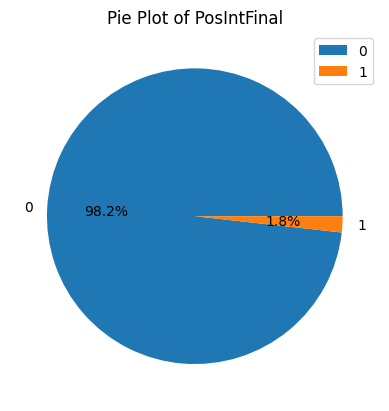

In [7]:
plt.pie([(df0.PosIntFinal==0).sum(),(df0.PosIntFinal==1).sum()],labels=['0','1'],autopct='%1.1f%%')
plt.title("Pie Plot of PosIntFinal")
plt.legend()
plt.savefig("../saved/pie_Y.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [8]:
df0[['High_impact_InjSev','LOCSeparate']].melt(var_name="Variable", value_name="Category")

,Variable,Category
0,High_impact_InjSev,2.0
1,High_impact_InjSev,2.0
2,High_impact_InjSev,2.0
3,High_impact_InjSev,1.0
4,High_impact_InjSev,2.0
...,...,...
86793,LOCSeparate,0.0
86794,LOCSeparate,0.0
86795,LOCSeparate,0.0
86796,LOCSeparate,0.0


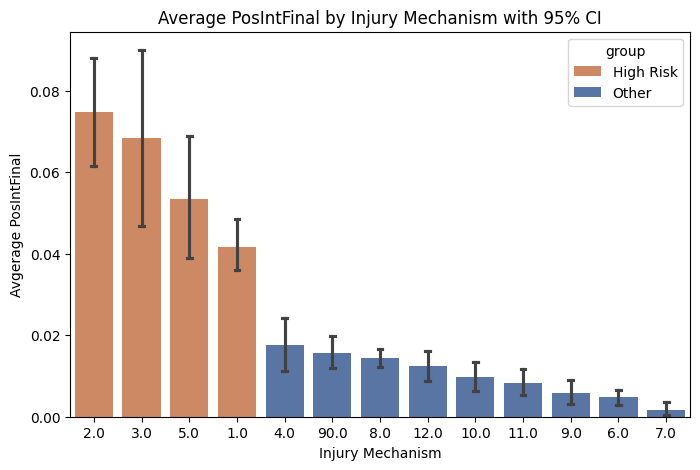

In [9]:
tmp = df0[["InjuryMech","PosIntFinal"]]
tmp['group'] = 'Other'
tmp.loc[tmp.InjuryMech.isin([1,2,3,5]),'group'] = "High Risk"
plt.figure(figsize=(8, 5))
order = df0.groupby("InjuryMech")["PosIntFinal"].mean().sort_values(ascending=False).index
sns.barplot(data=tmp, x="InjuryMech", y="PosIntFinal", ci=95, capsize=0.1,order=order,
            hue='group', palette=['#dd8452','#4c72b0'])

plt.title("Average PosIntFinal by Injury Mechanism with 95% CI")
plt.ylabel("Avgerage PosIntFinal")
plt.xlabel("Injury Mechanism")
plt.savefig("../saved/Injury_y.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [10]:
np.random.seed(123)
idx = np.random.choice(range(df0.shape[0]), int(df0.shape[0]*0.3),replace=False)
new_idx = np.random.choice(idx,len(idx),replace=False)

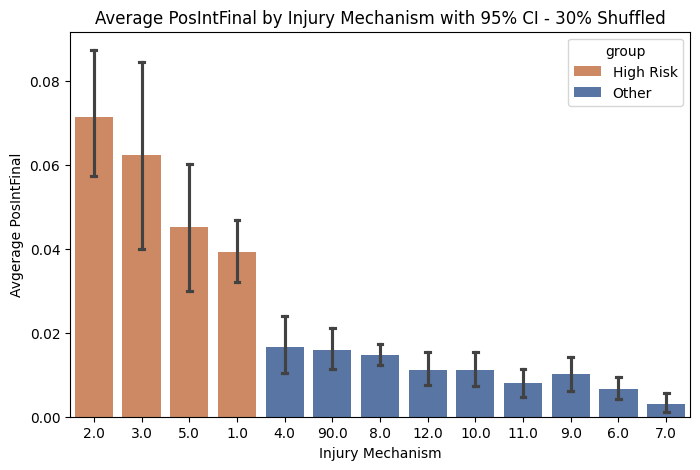

In [11]:
tmp = df0[["InjuryMech","PosIntFinal"]]
tmp['group'] = 'Other'
tmp.loc[tmp.InjuryMech.isin([1,2,3,5]),'group'] = "High Risk"
newvalues = tmp.loc[new_idx,'PosIntFinal'].reset_index(drop=True)
tmp.loc[idx,'PosIntFinal'] = newvalues
plt.figure(figsize=(8, 5))
order = df0.groupby("InjuryMech")["PosIntFinal"].mean().sort_values(ascending=False).index
sns.barplot(data=tmp, x="InjuryMech", y="PosIntFinal", ci=95, capsize=0.1,order=order,
            hue='group', palette=['#dd8452','#4c72b0'])

plt.title("Average PosIntFinal by Injury Mechanism with 95% CI - 30% Shuffled")
plt.ylabel("Avgerage PosIntFinal")
plt.xlabel("Injury Mechanism")
plt.savefig("../saved/Injury_y_shuffle.pdf", format="pdf", bbox_inches="tight")

plt.show()

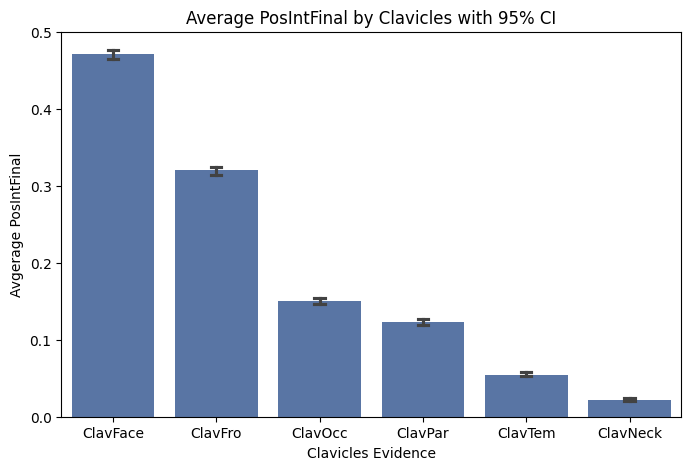

In [12]:
tmp = df0.loc[df0.Clav==1,["ClavFace", "ClavNeck", "ClavFro", "ClavOcc", "ClavPar", "ClavTem"]].melt()
# tmp['group'] = 'Other'
# tmp.loc[tmp.InjuryMech.isin([1,2,3,5]),'group'] = "High Risk"
plt.figure(figsize=(8, 5))
order = df0.loc[df0.Clav==1,["ClavFace", "ClavNeck", "ClavFro", "ClavOcc", "ClavPar", "ClavTem"]].mean().sort_values(ascending=False).index
sns.barplot(data=tmp, x="variable", y="value", ci=95, capsize=0.1,order=order,color='#4c72b0')

plt.title("Average PosIntFinal by Clavicles with 95% CI")
plt.ylabel("Avgerage PosIntFinal")
plt.xlabel("Clavicles Evidence")
plt.savefig("../saved/Clav_y.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [13]:
df0.loc[df0.Clav==1,["ClavFace", "ClavNeck", "ClavFro", "ClavOcc", "ClavPar", "ClavTem"]].melt()

,variable,value
0,ClavFace,1
1,ClavFace,0
2,ClavFace,0
3,ClavFace,0
4,ClavFace,0
...,...,...
166903,ClavTem,0
166904,ClavTem,0
166905,ClavTem,0
166906,ClavTem,0


The number of rows (43399) shows that the dataset contains the evaluable patients according to Figure 1 in the paper. Following the data processing in the original paper, we are going to exclude 969 patients with `GCSTotal` 3–13, and 18 patients with missing primary outcome. 

In [14]:
print(f"patients with GCS 3–13: {(df0.GCSTotal <= 13).sum()}, \npatients with missing primary outcome: {df0.loc[(df0.GCSTotal<=13)|(df0.PosIntFinal.isna()) ,:].shape[0]-(df0.GCSTotal <= 13).sum()}.")

patients with GCS 3–13: 969, 
patients with missing primary outcome: 18.


In [15]:
df = df0[~((df0.GCSTotal<=13)|(df0.PosIntFinal.isna()))]
df.shape

(42412, 125)

Besides, since `DeathTBI`, `HospHeadPosCT`, and `Intub24Head` are result variables which cannot be observed during the treatment, we are going to drop these variables

In [16]:
df.drop(['DeathTBI','HospHeadPosCT','Intub24Head'],inplace=True,axis=1)

## 1: Invalid or Inconsistent Values

Check numeric variables
* `GCSTotal`
* `AgeInMonth`
* `AgeinYears`

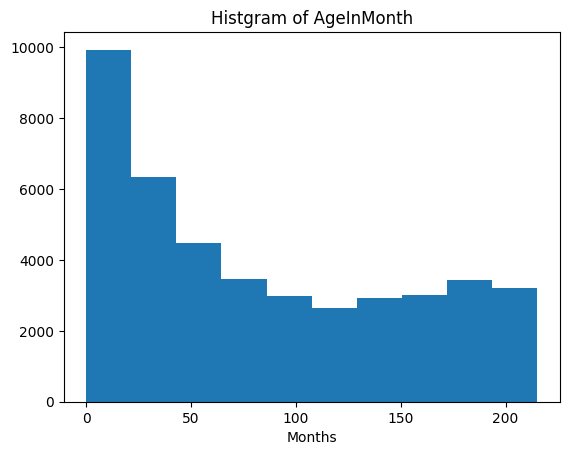

In [17]:
# AgeInMonth_value_counts = sorted(df.AgeInMonth.value_counts())
plt.hist(df.AgeInMonth)
plt.title('Histgram of AgeInMonth')
plt.xlabel('Months')
plt.show()

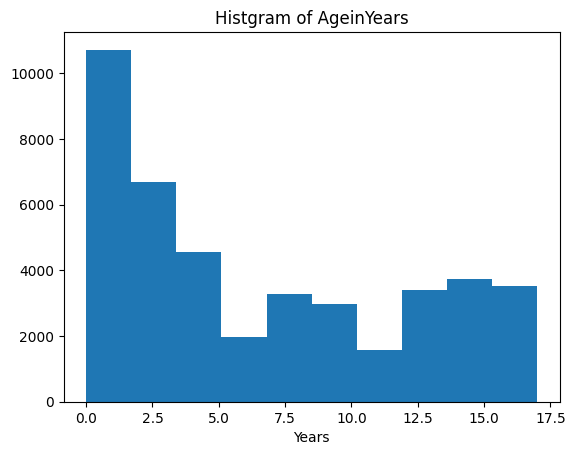

In [18]:
plt.hist(df.AgeinYears)
plt.title('Histgram of AgeinYears')
plt.xlabel('Years')
plt.show()

In [19]:
df.GCSTotal.value_counts()

GCSTotal
15    41071
14     1341
Name: count, dtype: int64

There is no obvious inconsistant or unreasonable data in these three numeric variables

In [20]:
df.EmplType.value_counts()

EmplType
5.0    21669
3.0    14081
4.0     3650
1.0     1948
2.0     1046
Name: count, dtype: int64

`Seiz=0` is equal to `SeizLen=92`.

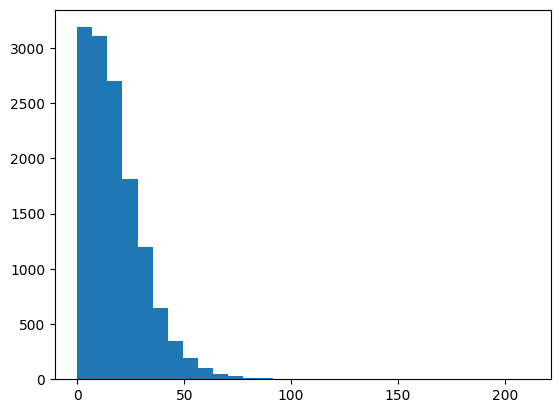

In [21]:
plt.hist(df.loc[df['HA_verb']==91, 'AgeInMonth'],bins=30)
plt.show()

There are 355 children less than 12 months old that were not marked as "too young to speak" in the `HA_verb`, we are going to record them as 91 here, so does `Amnesia_verb`. Besides, since their standards for Pre-verbal/Non-verbal are the same, it is reasonable to mark both of them as 91 if any of the two variables equals 91.

In [22]:
(df.loc[df['AgeInMonth']<12, 'HA_verb'] != 91).sum()

np.int64(355)

In [23]:
(df.loc[df['AgeInMonth']<12, 'Amnesia_verb'] != 91).sum()

np.int64(479)

In [24]:
df.loc[(df['HA_verb']==91)|(df['Amnesia_verb']==91), 'Amnesia_verb'] = 91
df.loc[(df['HA_verb']==91)|(df['Amnesia_verb']==91), 'HA_verb'] = 91
df.loc[df['AgeInMonth']<12, 'HA_verb'] = 91
df.loc[df['AgeInMonth']<12, 'Amnesia_verb'] = 91

After cleaning `GCSTotal`, values of `GCSGroup` all equal 2. Therefore we are going to drop it.

In [25]:
df.GCSGroup.value_counts()

GCSGroup
2    42412
Name: count, dtype: int64

In [26]:
df.drop(['GCSGroup'], axis=1, inplace=True)

`Clav=0|missing`和`Clvaxxx`取92是等价的 

In [27]:
df.loc[df.Clav==0,[col for col in df.columns if 'Clav' in col]].head()

,Clav,ClavFace,ClavNeck,ClavFro,ClavOcc,ClavPar,ClavTem
1,0.0,92,92,92,92,92,92
7,0.0,92,92,92,92,92,92
8,0.0,92,92,92,92,92,92
14,0.0,92,92,92,92,92,92
15,0.0,92,92,92,92,92,92


Indications: 部分情况下选择的“most important indications”太多了，比如有10/16个

In [28]:
len([col for col in df.columns if 'Ind' in col])

16

In [29]:
df.loc[(df.IndAge!=91)&(df.IndAge!=92),[col for col in df.columns if 'Ind' in col]].sum(1).value_counts()

2     5500
1     4064
3     3486
0     1375
4     1175
5      300
6       62
7        7
8        3
10       1
9        1
Name: count, dtype: int64

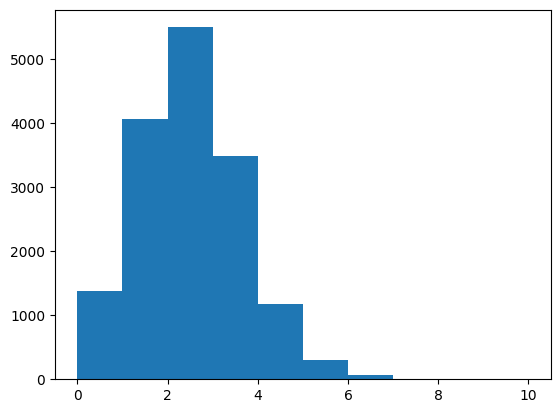

In [30]:
plt.hist(df.loc[(df.IndAge!=91)&(df.IndAge!=92),[col for col in df.columns if 'Ind' in col]].sum(1))
plt.show()

<Axes: >

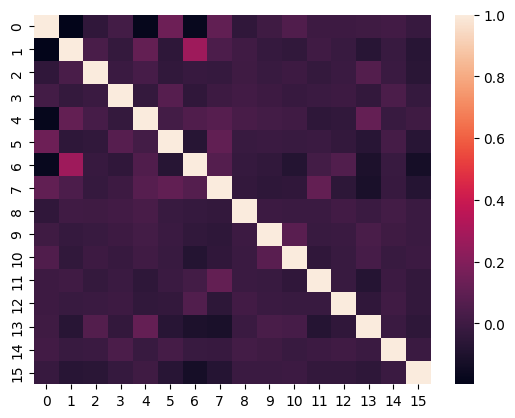

In [31]:
sns.heatmap(np.corrcoef(df.loc[(df.IndAge!=91)&(df.IndAge!=92),[col for col in df.columns if 'Ind' in col]].values.T))

The values of `AgeTwoPlus`, `Gender`, `Ethnicity` are 1/2, not 1/0, which do not align with other variables and may cause some unneccesary problem while fitting models. Thus we will change it. Additionally, there are still 91 values in `AgeTwoPlus` even though we have `AgeInMonth` variable, so we can modify it.

In [32]:
df.loc[df['AgeInMonth']>=24, 'AgeTwoPlus'] = 1
df.loc[df['AgeInMonth']<24, 'AgeTwoPlus'] = 0

In [33]:
df.loc[df['Gender']==1, 'Gender'] = 0
df.loc[df['Gender']==2, 'Gender'] = 1
df.loc[df['Ethnicity']==1, 'Ethnicity'] = 0
df.loc[df['Ethnicity']==2, 'Ethnicity'] = 1

There are some cases where the physician indicated that the seizure is the most important indications in influencing the decision to obtain a head CT (`IndSeiz=1`), but with `Seiz=0`. Same things happen to `Vomit`, `HA_verb`, `Hema`, etc. For these problems, we will assume the observation is correct and modify the Indicator variables.

In [34]:
df.loc[df.IndSeiz==1,'Seiz'].value_counts()

Seiz
1.0    355
0.0     15
Name: count, dtype: int64

In [35]:
df.loc[(df.Seiz==0)&(df.IndSeiz==1),'IndSeiz'] = 0

In [36]:
df.loc[df.IndVomit==1,'Vomit'].value_counts()

Vomit
1.0    2916
0.0      36
Name: count, dtype: int64

In [37]:
df.loc[(df.Vomit==0)&(df.IndVomit==1),'IndVomit'] = 0

In [38]:
df.loc[df.IndHA==1,'HA_verb'].value_counts()

HA_verb
1.0     2650
91.0      99
0.0       50
Name: count, dtype: int64

In [39]:
df.loc[(df.HA_verb==0)&(df.IndHA==1),'IndHA'] = 0

In [40]:
df.loc[df.IndHema==1,'Hema'].value_counts()

Hema
1.0    2593
0.0      66
Name: count, dtype: int64

In [41]:
df.loc[(df.Hema==0)&(df.IndHema==1),'IndHema'] = 0

Since `Finding` variables are all the results found after the CT, but we want the indicator that can decided whether CT is needed. So we cannot include them in our models and we will not clean these variables but to drop these columns before fitting models. Simiarly, since `IndXXX` variables are the indicators for the CT test, and the information is contained in we will not include 

In [42]:
df[['HospHead','PosIntFinal']].corr()

,HospHead,PosIntFinal
HospHead,1.000000,0.889579
PosIntFinal,0.889579,1.000000


Although `HospHead` and `PosIntFinal` are highly correlated, we do not think it can be used as a interpretor, because the correlation may come from the causality, i.e. the reason why patients has to be hospitalized is that there are some severe symptoms detected after taking CT. Therefore we are going to drop this variable.

In [43]:
df.drop(['HospHead'], axis=1, inplace=True)

## 2: Improperly Formatted Missing Values

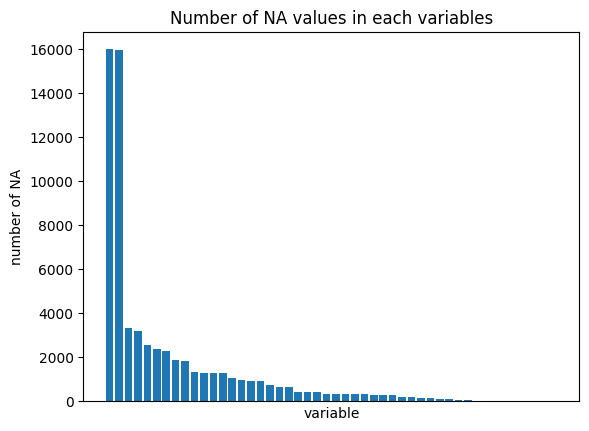

In [44]:
num_na = df0.isna().sum(0)
plt.bar(list(num_na.index)[:(num_na>0).sum()],sorted(num_na, reverse=True)[:(num_na>0).sum()])
plt.xticks([])
plt.title('Number of NA values in each variables')
plt.xlabel('variable')
plt.ylabel('number of NA')
plt.savefig("../saved/hist_NA.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [45]:
df.shape

(42412, 120)

In [46]:
df[['Dizzy','PosIntFinal','Ethnicity']].corr()

,Dizzy,PosIntFinal,Ethnicity
Dizzy,1.000000,0.016832,-0.002110
PosIntFinal,0.016832,1.000000,0.005469
Ethnicity,-0.002110,0.005469,1.000000


Since There are too many NA values in `Dizzy` and `Ethnicity` comparing to other variables, and we did not observe correlationship between the two variables and the output, we dicided to drop them

In [47]:
df.drop(['Dizzy','Ethnicity'], axis=1,inplace=True)

Based on two independent assessments, only dizziness and scalp haematoma had insuﬃcient inter-observer agreement. This shows that `EmplType` and `Certification` do not significantly influence the results. Therefore we are going to drop these variables.

In [48]:
df.drop(['EmplType','Certification'], axis=1,inplace=True)

In [49]:
# num_na[num_na>1000].sort_values(key=lambda x:-x)
num_na = df.isna().sum(0)
num_na[num_na<100].sort_values(key=lambda x:-x)[:20]

SeizLen           74
SeizOccur         50
SFxPalpDepress    31
CTForm1           28
EDDisposition     20
Gender             3
CTDone             0
AgeTwoPlus         0
AgeinYears         0
AgeInMonth         0
CTSedOth           0
CTSedRqst          0
PatNum             0
EDCT               0
CTSedAgitate       0
IndOth             0
IndXraySFx         0
IndVomit           0
IndSeiz            0
IndRqstTrauma      0
dtype: int64

There are several variables with small amount of NA. Considering that there is no strong reason to keep these NA information, and keeping it will result in more sparse dummy variables, we are going to directly drop the corresponding rows (189 rows in total).

In [50]:
num_na[num_na>100].sort_values(key=lambda x:-x).index

Index(['Race', 'ActNorm', 'Observed', 'LocLen', 'Drugs', 'LOCSeparate',
       'Amnesia_verb', 'HAStart', 'GCSMotor', 'GCSVerbal', 'GCSEye',
       'HASeverity', 'VomitLast', 'CTSed', 'Seiz', 'HemaSize', 'SFxBas',
       'VomitStart', 'HA_verb', 'NeuroD', 'Sedated', 'Paralyzed', 'AMS',
       'High_impact_InjSev', 'Intubated', 'Vomit', 'Hema', 'InjuryMech',
       'VomitNbr', 'HemaLoc', 'OSI', 'FontBulg', 'Clav', 'SFxPalp'],
      dtype='object')

Here we check the correlationship whether variables are NA or not. But doing this, we can check if most the NA variables actually exsist in the same group of people and this may bring some insights of the dataset.

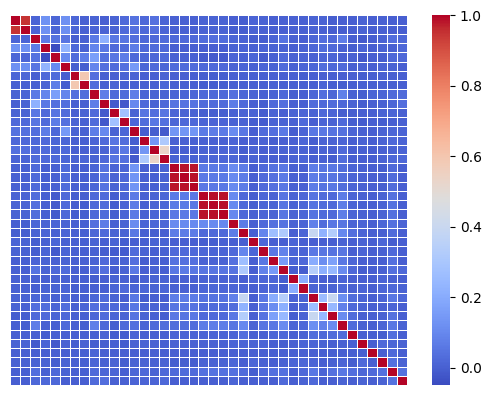

In [51]:
nan_corr = np.corrcoef(df.isna().values[:,df.isna().values[:,:].sum(axis=0)>0].T)
nan_vars = df.columns[df.isna().values[:,:].sum(axis=0)>0]
sns.heatmap(nan_corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.xticks([])
plt.yticks([])
plt.show()

In [52]:
nan_vars_names = df.columns[df.isna().values[:,:].sum(axis=0)>0]

upper_tri = np.triu(nan_corr, k=1)
high_corr_idx = np.argwhere(np.triu(nan_corr, k=1) > 0.3)
high_corr_pairs = pd.DataFrame([(nan_vars_names[i], nan_vars_names[j], float(nan_corr[i, j])) for i, j in high_corr_idx])
high_corr_pairs.columns = ['var1','var2','corr']

In [53]:
high_corr_pairs.sort_values('corr',ascending=False)

,var1,var2,corr
9,GCSVerbal,GCSMotor,0.988160
7,GCSEye,GCSVerbal,0.988108
6,Paralyzed,Sedated,0.985854
8,GCSEye,GCSMotor,0.985296
4,Intubated,Paralyzed,0.984134
5,Intubated,Sedated,0.982588
0,InjuryMech,High_impact_InjSev,0.950531
1,SeizOccur,SeizLen,0.591267
3,VomitStart,VomitLast,0.533799
14,Clav,OSI,0.395946


这几个>0.5的明显偏高，分析原因

* Intubated (Is the physician's evaluation being made after the patient was intubated?), Paralyzed(Is the physician's evaluation being made after the patient was pharmacologically paralyzed?), Sedated (Is physician's evaluation being made after the patient was pharmacologically sedated?)
* GCSEye (GCS component: eye), GCSVerbal (GCS component: verbal), GCSMotor (GCS component: motor)
* High_impact_InjSev (Severity of injury mechanism), InjuryMech (Injury mechanism)
<!-- * Seiz (Post-traumatic seizure?), SeizOccur (When did the post-traumatic seizure occur?)
* VomitNbr (How many vomiting episodes?), VomitStart (When did the vomiting start?) -->

In [54]:
df.drop(['GCSEye', 'GCSVerbal', 'GCSMotor'], axis=1, inplace=True)

Because `GCSEye`, `GCSVerbal`, `GCSMotor` are all the components of `GCSTotal` and we decided to delete samples with `GCSTotal` < 14, which means these three variables are mostly full credited. Therefore we decided to delete these three varibles due to the multicolinearity and missing value problems.

In [55]:
df.isna().sum(axis=0)[['Intubated','Paralyzed','Sedated']]

Intubated    310
Paralyzed    320
Sedated      321
dtype: int64

In [56]:
df.loc[df[['Intubated','Paralyzed','Sedated']].isna().any(axis=1),'PosIntFinal'].sum()

np.float64(2.0)

In [57]:
df[['Intubated','Paralyzed','Sedated']].sum(axis=0)

Intubated     4.0
Paralyzed     4.0
Sedated      32.0
dtype: float64

In [58]:
df.loc[(df.Intubated==1)|(df.Paralyzed==1)|(df.Sedated==1),'PosIntFinal'].sum()

np.float64(2.0)

Since the missing value of this set of varibles (`Intubated`, `Paralyzed`, `Sedated`) are relatively small, and most of them are 0 (most of rows with positive values have been deleted because they have low `GCSTotal`), yet the missing of these variables does not significantly identify the outcome, it is reasonable to assume these variables are not neccesary, and we will delete them.

In [59]:
df.drop(['Intubated','Paralyzed','Sedated'], axis=1, inplace=True)

For the rest of NA values, since the amount is large and do not occur in the same subgroups, and they are all categorical variables, we are going to encode it as a new dummy variable to keep the information and avoid dropping to many samples. Specifically, we will impute NA with string "NA" and transform the categorical variables into dummy variables. It should be minded that there are many groups of variables that share the same "not applicable" reasons with value of 91 or 92. We should identify and drop these repetive columns. All these work will be done at the end of the data cleaning part.

---

Multi-colinearity


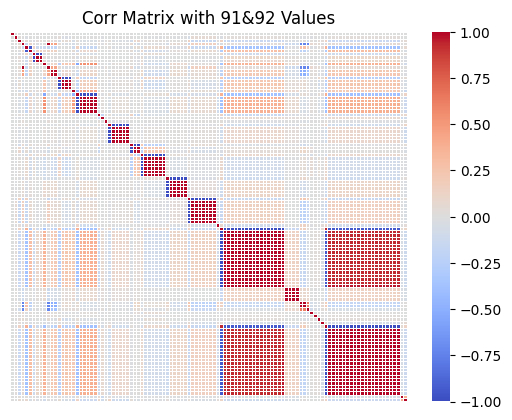

In [60]:
sns.heatmap(df.corr().values, xticklabels=nan_vars, yticklabels=nan_vars, 
            cmap='coolwarm', annot=False, linewidths=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Corr Matrix with 91&92 Values')
plt.savefig("../saved/corr_with92.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [61]:
df1 = df.copy()
df1.replace(91, np.nan, inplace=True)
df1.replace(92, np.nan, inplace=True)

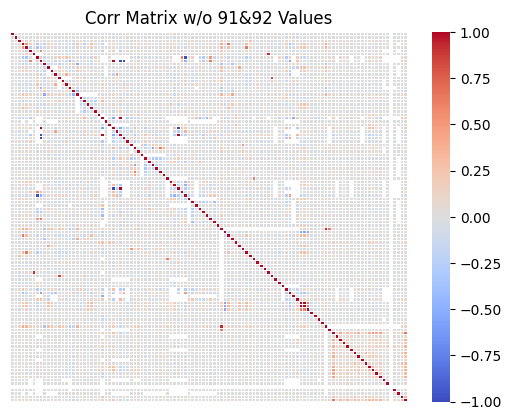

In [62]:
sns.heatmap(df1.corr().values, xticklabels=nan_vars, yticklabels=nan_vars, 
            cmap='coolwarm', annot=False, linewidths=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Corr Matrix w/o 91&92 Values')
plt.savefig("../saved/corr_without92.pdf", format="pdf", bbox_inches="tight")
plt.show()

We found that most correlationship between variables are caused by the "not applicable", which is 91 or 92. After remarking these values as NA, we can show the real correlationship. It turns out only a few variables are stongly correlated with each other. Here we are going to discuss the reason of these multicolinearity problems.

In [63]:
var_corr = df1.corr().values
upper_tri_var = np.triu(var_corr, k=1)
high_var_corr_idx = np.argwhere(np.abs(np.triu(var_corr, k=1) > 0.7))
high_var_corr_pairs = pd.DataFrame([(df1.columns[i], df1.columns[j], float(var_corr[i, j])) for i, j in high_var_corr_idx])
high_var_corr_pairs.columns = ['var1','var2','corr']

In [64]:
high_var_corr_pairs.sort_values('corr',ascending=False)

,var1,var2,corr
1,SeizLen,SFxBasHem,1.000000
3,SFxPalpDepress,SFxBasPer,1.000000
4,SFxBasPer,NeuroDCranial,1.000000
6,AgeInMonth,AgeinYears,0.998659
5,CTForm1,CTDone,0.931383
0,Seiz,IndSeiz,0.923050
2,Vomit,IndVomit,0.849123


In [65]:
df1[['SeizLen','SFxBasHem','NeuroDCranial']].isna().sum()

SeizLen          41992
SFxBasHem        42125
NeuroDCranial    41861
dtype: int64

The reason why these variables are highly correlated is that there are too many "not applicable" values. We will handle this later.

Additionally, `AgeInMonth` and `AgeinYears` are the same thing, so we will drop `AgeinYears`

In [66]:
df.drop(['AgeinYears'], axis=1, inplace=True)

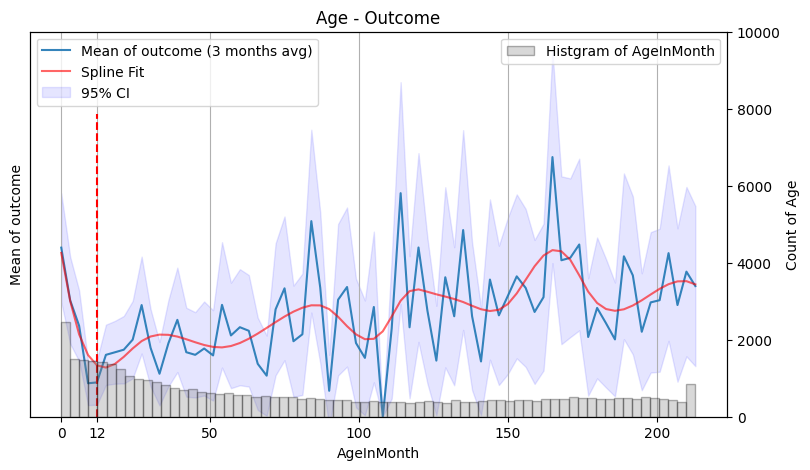

In [67]:
df_age = df0[['AgeInMonth', 'PosIntFinal']].copy()
df_age['age_group'] = (df_age['AgeInMonth'] // 3) * 3
age_groups = df_age.groupby('age_group')['PosIntFinal']
age_mean = age_groups.mean()
age_std = age_groups.std()
age_count = age_groups.count()

ages = age_mean.index
y_mean = age_mean.values
y_std = age_std.values
y_count = age_count.values

ci = 1.96 * y_std / np.sqrt(y_count)
y_upper = y_mean + ci
y_lower = y_mean - ci

spline = UnivariateSpline(ages, y_mean, s=0.003)

fig, ax1 = plt.subplots(figsize=(9, 5))
ax1.plot(ages, y_mean, '-', label='Mean of outcome (3 months avg)', alpha=0.9)
ax1.plot(ages, spline(ages), label='Spline Fit', color='red', alpha=0.6)  

ax1.fill_between(ages, y_lower, y_upper, color='blue', alpha=0.1, label="95% CI")

ax1.set_xlabel('AgeInMonth')
ax1.set_ylabel('Mean of outcome')
ax1.legend(loc='upper left')
ax1.grid()
ax1.set_ylim(0,0.07)
ax1.set_yticks([])
ax1.vlines(12, -0, 0.055, linestyles='--', colors='red')

ax2 = ax1.twinx()
ax2.hist(df_age.age_group, bins=70, color='gray', alpha=0.3, edgecolor='black', label='Histgram of AgeInMonth') 
ax2.set_ylim(0, 10000)
ax2.set_ylabel('Count of Age')
ax2.set_xticks([0,12,50,100,150,200])
ax2.legend()

plt.title('Age - Outcome')
plt.savefig("../saved/age_outcome.pdf", format="pdf", bbox_inches="tight")
plt.show()


The relationship between age and outcome differs when age is <=12 and >12. The average outcome decreases along with age while age <= 12 and increases vise versa. To analyze and verify this finding, we will add two variables: `I{age<=12}` and `I{age<=12} * age`.


In [68]:
df['age_indicator'] = (df['AgeInMonth'] <= 12).astype(int)
df['age_indicator_inter'] = df['age_indicator'] * df['AgeInMonth']

---

In [69]:
df.drop([c for c in df.columns if 'Ind' in c], axis=1, inplace=True)
df.drop([c for c in df.columns if 'Finding' in c], axis=1, inplace=True)
df.drop([c for c in df.columns if 'CT'==c[:2]], axis=1, inplace=True)

Since the pharmacological sedation cannot be used as a indicator to decide whether the CT is needed, and it do not influence the outcome. Therefore we are going to drop these variables.

In [70]:
col_todrop = ['PatNum', 'EDCT', 'PosCT', 'EDDisposition','Observed']
df.drop(col_todrop, axis=1, inplace=True)

In [71]:
df.shape

(42412, 65)

In [72]:
pd.DataFrame(df.columns).to_csv('../data/x_col.csv')

In [73]:
rename_dict = {
    "InjuryMech": "InjuryMechanism",
    "High_impact_InjSev": "InjurySeverity",
    "Amnesia_verb": "HasAmnesia",
    "LOCSeparate": "LossOfConsciousness",
    "LocLen": "LOC_Duration",
    "Seiz": "PostTraumaticSeizure",
    "SeizOccur": "SeizureTiming",
    "SeizLen": "SeizureDuration",
    "ActNorm": "ParentalAssessment",
    "HA_verb": "HeadachePresent",
    "HASeverity": "HeadacheSeverity",
    "HAStart": "HeadacheOnset",
    "Vomit": "VomitingPresent",
    "VomitNbr": "VomitingEpisodes",
    "VomitStart": "VomitingOnset",
    "VomitLast": "LastVomitingEpisode",
    "Dizzy": "DizzinessPresent",
    "GCSTotal": "GCS_Total",
    "AMS": "AlteredMentalStatus",
    "AMSAgitated": "AMS_Agitated",
    "AMSSleep": "AMS_Sleepy",
    "AMSSlow": "AMS_SlowResponse",
    "AMSRepeat": "AMS_RepetitiveQuestions",
    "AMSOth": "AMS_Other",
    "SFxPalp": "PalpableSkullFracture",
    "SFxPalpDepress": "DepressedSkullFracture",
    "FontBulg": "FontanelleBulging",
    "SFxBas": "BasilarSkullFracture",
    "SFxBasHem": "BasilarFracture_Hemotympanum",
    "SFxBasOto": "BasilarFracture_CSF_Otorrhea",
    "SFxBasPer": "BasilarFracture_PeriorbitalEcchymosis",
    "SFxBasRet": "BasilarFracture_RetroauricularEcchymosis",
    "SFxBasRhi": "BasilarFracture_CSF_Rhinorrhea",
    "Hema": "ScalpHematoma",
    "HemaLoc": "HematomaLocation",
    "HemaSize": "HematomaSize",
    "Clav": "TraumaAboveClavicle",
    "ClavFace": "TraumaFace",
    "ClavNeck": "TraumaNeck",
    "ClavFro": "TraumaScalpFrontal",
    "ClavOcc": "TraumaScalpOccipital",
    "ClavPar": "TraumaScalpParietal",
    "ClavTem": "TraumaScalpTemporal",
    "NeuroD": "NeurologicalDeficit",
    "NeuroDMotor": "NeuroDeficit_Motor",
    "NeuroDSensory": "NeuroDeficit_Sensory",
    "NeuroDCranial": "NeuroDeficit_CranialNerve",
    "NeuroDReflex": "NeuroDeficit_Reflexes",
    "NeuroDOth": "NeuroDeficit_Other",
    "OSI": "OtherSubstantialInjury",
    "OSIExtremity": "SubstantialInjury_Extremity",
    "OSICut": "SubstantialInjury_Laceration",
    "OSICspine": "SubstantialInjury_CSpine",
    "OSIFlank": "SubstantialInjury_ChestBackFlank",
    "OSIAbdomen": "SubstantialInjury_Abdomen",
    "OSIPelvis": "SubstantialInjury_Pelvis",
    "OSIOth": "SubstantialInjury_Other",
    "Drugs": "SuspectedIntoxication",
    "AgeInMonth": "AgeInMonth",
    "AgeTwoPlus": "AgeTwoPlus",
    "Gender": "Gender",
    "Ethnicity": "Ethnicity",
    "Race": "Race",
    "Neurosurgery": "NeurosurgeryRequired",
    "PosIntFinal": "PosIntFinal",
    "age_indicator": "AgeOneLess",
    "age_indicator_inter": "AgeOneLess_Inter"
}

df.rename(columns=rename_dict, inplace=True)

In [74]:
numeric_vars = ['AgeInMonth','age_indicator_inter']
y_var = 'PosIntFinal'
cate_vars = [i for i in df.columns if i not in numeric_vars and i!=y_var]

In [75]:
df_dummies = pd.get_dummies(df, columns=cate_vars, dummy_na=True, drop_first=True)

# transform the dtype from bool to int
df_dummies.loc[:,df_dummies.dtypes == np.bool] = df_dummies.loc[:,df_dummies.dtypes == np.bool].astype(int)

Drop the nan dummy variables with all values equaling False

In [76]:
nan_cols = np.array([c for c in df_dummies.columns if '_nan' in c])
df_dummies.drop(nan_cols[df_dummies[nan_cols].sum(0) == 0], axis=1, inplace=True)

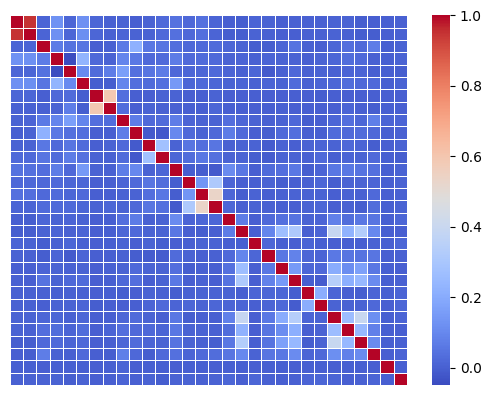

In [77]:
nan_cols = np.array([c for c in df_dummies.columns if '_nan' in c])
sns.heatmap(df_dummies[nan_cols].corr(), cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.xticks([])
plt.yticks([])
plt.show()


In [78]:
df_dummies.drop(['InjurySeverity_nan'], axis=1, inplace=True)

Drop the similar 91/92 columns

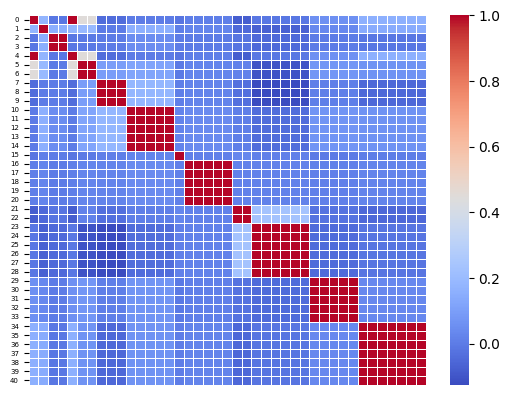

In [79]:
notapplicable_cols = np.array([c for c in df_dummies.columns if '91' in c or '92' in c])
sns.heatmap(df_dummies[notapplicable_cols].corr(), cmap='coolwarm', annot=False, 
            linewidths=0.5,yticklabels=list(range(len(notapplicable_cols))))
plt.xticks([])
plt.yticks(fontsize=5)
# plt.figure(dpi=400)
# plt.yticks([])
plt.show()

Obviously, the rules of "Not applicable" have similarity for several groups of variables. we are going to drop these columns

In [80]:
cols_keep_91 = ['HasAmnesia_91.0', 'LOC_Duration_92.0', 'SeizureTiming_92.0', 'HeadacheSeverity_92.0', 'VomitingEpisodes_92.0', 'AMS_Agitated_92.0', 'DepressedSkullFracture_92.0', 'BasilarFracture_Hemotympanum_92.0', 'HematomaLocation_92.0', 'TraumaFace_92.0', 'NeuroDeficit_Motor_92.0', 'SubstantialInjury_Extremity_92.0']
cols_drop_91 = [str(c) for c in notapplicable_cols if c not in cols_keep_91]

In [81]:
df_dummies.drop(cols_drop_91, axis=1, inplace=True)

Check the correlationship of the rest variables

In [82]:
corr_dummy = df_dummies.corr().values
corr_idx_dummy = np.argwhere(np.triu(corr_dummy, k=1) > 0.5)
high_var_corr_pairs_dummy = pd.DataFrame([(df_dummies.columns[i], df_dummies.columns[j], float(corr_dummy[i, j])) for i, j in corr_idx_dummy])
high_var_corr_pairs_dummy.columns = ['var1','var2','corr']

In [83]:
high_var_corr_pairs_dummy.sort_values('corr', ascending=False)

,var1,var2,corr
7,HeadachePresent_1.0,HeadacheOnset_2.0,0.863368
20,NeurologicalDeficit_1.0,NeuroDeficit_Other_1.0,0.739372
16,BasilarSkullFracture_1.0,BasilarFracture_Hemotympanum_1.0,0.721771
21,OtherSubstantialInjury_1.0,SubstantialInjury_Extremity_1.0,0.719706
10,VomitingPresent_1.0,VomitingOnset_2.0,0.704381
15,PalpableSkullFracture_1.0,DepressedSkullFracture_1.0,0.693041
14,AlteredMentalStatus_1.0,AMS_Sleepy_1.0,0.692594
18,ScalpHematoma_1.0,HematomaSize_2.0,0.663123
1,AgeInMonth,AgeTwoPlus_1.0,0.635681
6,HeadachePresent_1.0,HeadacheSeverity_2.0,0.600949


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif_data = pd.DataFrame()
vif_data["Feature"] = df_dummies.columns
vif_data["VIF"] = [variance_inflation_factor(df_dummies.values, i) for i in range(df_dummies.shape[1])]

In [76]:
vif_data.sort_values('VIF', ascending=False).head(40)

,Feature,VIF
109,NeuroDeficit_Motor_92.0,inf
97,TraumaAboveClavicle_1.0,inf
100,TraumaFace_92.0,inf
106,NeurologicalDeficit_1.0,inf
92,HematomaLocation_92.0,inf
28,PostTraumaticSeizure_1.0,inf
88,ScalpHematoma_1.0,inf
26,LOC_Duration_92.0,inf
83,BasilarFracture_Hemotympanum_92.0,inf
114,OtherSubstantialInjury_1.0,inf


In [77]:
vars_high_corr = list(vif_data.loc[vif_data.VIF>10, 'Feature'])

In [78]:
df_dummies.drop(vars_high_corr, axis=1, inplace=True)

In [79]:
vars_high_corr

['InjuryMechanism_6.0',
 'InjuryMechanism_7.0',
 'InjuryMechanism_nan',
 'InjurySeverity_2.0',
 'InjurySeverity_3.0',
 'LossOfConsciousness_1.0',
 'LossOfConsciousness_2.0',
 'LOC_Duration_92.0',
 'PostTraumaticSeizure_1.0',
 'SeizureTiming_92.0',
 'HeadachePresent_1.0',
 'HeadacheSeverity_92.0',
 'HeadacheOnset_2.0',
 'HeadacheOnset_nan',
 'VomitingPresent_1.0',
 'VomitingEpisodes_92.0',
 'VomitingOnset_2.0',
 'VomitingOnset_3.0',
 'VomitingOnset_4.0',
 'AlteredMentalStatus_1.0',
 'AMS_Agitated_92.0',
 'PalpableSkullFracture_1.0',
 'DepressedSkullFracture_92.0',
 'BasilarSkullFracture_1.0',
 'BasilarFracture_Hemotympanum_92.0',
 'ScalpHematoma_1.0',
 'HematomaLocation_92.0',
 'TraumaAboveClavicle_1.0',
 'TraumaFace_92.0',
 'NeurologicalDeficit_1.0',
 'NeuroDeficit_Motor_92.0',
 'OtherSubstantialInjury_1.0',
 'SubstantialInjury_Extremity_92.0',
 'AgeOneLess_1.0']

In [466]:
df_dummies.to_csv('../data/data_cleaned.csv')

---

In [1]:
from clean import clean_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import UnivariateSpline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.svm import SVC


In [3]:
df0 = pd.read_csv('../data/TBI PUD 10-08-2013.csv')
df = clean_data(df0)

In [4]:
df.head()

,AgeInMonth,PosIntFinal,AgeOneLess_Inter,InjuryMechanism_2.0,InjuryMechanism_3.0,InjuryMechanism_4.0,InjuryMechanism_5.0,InjuryMechanism_8.0,InjuryMechanism_9.0,InjuryMechanism_10.0,...,AgeTwoPlus_1.0,Gender_1.0,Gender_nan,Race_2.0,Race_3.0,Race_4.0,Race_5.0,Race_90.0,Race_nan,NeurosurgeryRequired_1.0
0,197,0.0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,64,0.0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
3,13,0.0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,46,0.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,51,0.0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [5]:
scaler = StandardScaler()
df[['AgeOneLess_Inter','AgeInMonth']] = scaler.fit_transform(df[['AgeOneLess_Inter','AgeInMonth']].values)

X_col = [c for c in df.columns if c!='PosIntFinal']
y = df['PosIntFinal'].values
X = df[X_col].values

In [6]:
def exp_logistic(col,seed,C):
    np.random.seed(seed)
    col = np.array(col)
    y = df['PosIntFinal'].values
    X = df[col].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)
    if C==0:
        model = LogisticRegression(class_weight={0:1, 1:100})
    else:
        model = LogisticRegression(penalty='l1', solver='liblinear', C=C, class_weight={0:1, 1:100}) 
    model.fit(X_train, y_train)
    print(f"C={C}, AUC on val: {roc_auc_score(y_val,model.predict_proba(X_val)[:,1]): .4f}, AUC on test: {roc_auc_score(y_test,model.predict_proba(X_test)[:,1]): .4f}")
    return model, col[(model.coef_!=0).flatten()].tolist(), pd.DataFrame([col[(model.coef_!=0).flatten()],model.coef_[model.coef_!=0]]).T


In [7]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)

In [8]:
seed = 12
# C = 0.005
for C in [1, 0.8, 0.5, 0.3, 0.1, 0.05, 0.03, 0.01, 0.005, 0.003, 0.001]:
    exp_logistic(X_col, seed, C)
# model_logistics,col1,coe1, = exp_logistic(X_col, seed, C)
# model_logistics,col2,coe2 = exp_logistic([c for c in col1 if '_nan' not in c], seed, C)

C=1, AUC on val:  0.8996, AUC on test:  0.9412
C=0.8, AUC on val:  0.9012, AUC on test:  0.9415
C=0.5, AUC on val:  0.9046, AUC on test:  0.9419
C=0.3, AUC on val:  0.9085, AUC on test:  0.9422
C=0.1, AUC on val:  0.9159, AUC on test:  0.9427
C=0.05, AUC on val:  0.9179, AUC on test:  0.9430
C=0.03, AUC on val:  0.9184, AUC on test:  0.9433
C=0.01, AUC on val:  0.9124, AUC on test:  0.9422
C=0.005, AUC on val:  0.9066, AUC on test:  0.9359
C=0.003, AUC on val:  0.8945, AUC on test:  0.9240
C=0.001, AUC on val:  0.8527, AUC on test:  0.8938


In [14]:
C = 0.03
model_logistics,col1,coe1, = exp_logistic(X_col, seed, C)

C=0.03, AUC on val:  0.9184, AUC on test:  0.9433


In [10]:
def exp_svm(col,seed,C):
    np.random.seed(seed)
    col = np.array(col)
    y = df['PosIntFinal'].values
    X = df[col].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)
    model = SVC(kernel='rbf', C=C, gamma='scale', probability=True, class_weight={0:1, 1:100})
    model.fit(X_train, y_train)
    print(f"C={C}, AUC on val: {roc_auc_score(y_val,model.predict_proba(X_val)[:,1]): .4f}, AUC on test: {roc_auc_score(y_test,model.predict_proba(X_test)[:,1]): .4f}")
    return model


In [11]:
seed = 12
for C in [0.1,1,3,5,10,20,30,50]:
    exp_svm(X_col, seed, C)

C=0.1, AUC on val:  0.9048, AUC on test:  0.9287
C=1, AUC on val:  0.8651, AUC on test:  0.8900
C=3, AUC on val:  0.8563, AUC on test:  0.8774
C=5, AUC on val:  0.8564, AUC on test:  0.8701
C=10, AUC on val:  0.8565, AUC on test:  0.8650
C=20, AUC on val:  0.8562, AUC on test:  0.8596
C=30, AUC on val:  0.8565, AUC on test:  0.8582
C=50, AUC on val:  0.8568, AUC on test:  0.8587


In [7]:
model_svm = SVC(kernel='rbf', C=0.1, gamma='scale', probability=True, class_weight={0:1, 1:100})
model_svm.fit(X_train, y_train)

SVC(C=0.1, class_weight={0: 1, 1: 100}, probability=True)

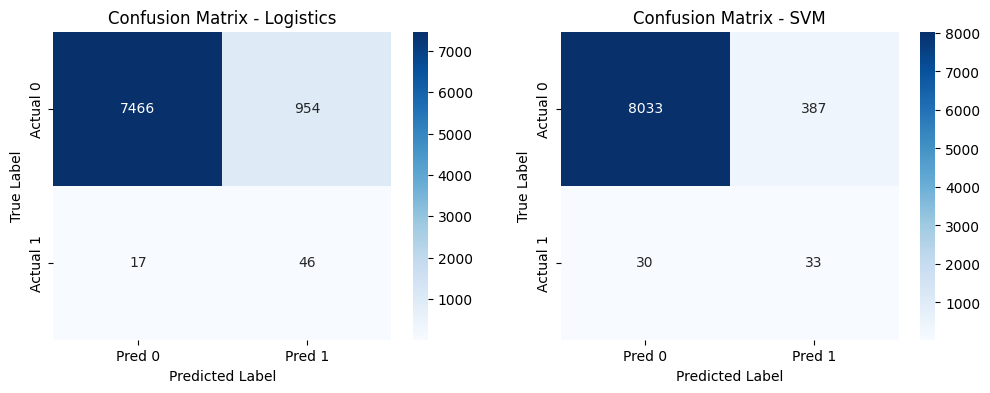

In [15]:
cm1 = confusion_matrix(y_test, model_logistics.predict(X_test))
cm2 = confusion_matrix(y_test, model_svm.predict(X_test))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[0])
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")
axes[0].set_title("Confusion Matrix - Logistics")
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[1])
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")
axes[1].set_title("Confusion Matrix - SVM")
plt.savefig("../saved/cm.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [16]:
def exp_logistic_shuffle(seed,C,rate=0.1):
    df0 = pd.read_csv('../data/TBI PUD 10-08-2013.csv')
    df = clean_data(df0)
    np.random.seed(seed)
    
    y = df['PosIntFinal'].values
    X = df.drop('PosIntFinal',axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    idx = np.random.choice(range(X_train.shape[0]), int(X_train.shape[0]*rate),replace=False)
    y_train[idx] = np.random.permutation(y_train[idx])

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)
    if C==0:
        model = LogisticRegression(class_weight={0:1, 1:100})
    else:
        model = LogisticRegression(penalty='l1', solver='liblinear', C=C, class_weight={0:1, 1:100}) 
    model.fit(X_train, y_train)
    print(f"rate={rate:.1f}, AUC on val: {roc_auc_score(y_val,model.predict_proba(X_val)[:,1]): .4f}, AUC on test: {roc_auc_score(y_test,model.predict_proba(X_test)[:,1]): .4f}")
    # return model


In [17]:
for r in np.linspace(0,1,11):
    exp_logistic_shuffle(1,0.03,r)

rate=0.0, AUC on val:  0.9131, AUC on test:  0.9176
rate=0.1, AUC on val:  0.6642, AUC on test:  0.9176
rate=0.2, AUC on val:  0.5090, AUC on test:  0.9176
rate=0.3, AUC on val:  0.5074, AUC on test:  0.9182
rate=0.4, AUC on val:  0.4816, AUC on test:  0.9086
rate=0.5, AUC on val:  0.4649, AUC on test:  0.8846
rate=0.6, AUC on val:  0.5286, AUC on test:  0.8623
rate=0.7, AUC on val:  0.4277, AUC on test:  0.7983
rate=0.8, AUC on val:  0.4785, AUC on test:  0.8016
rate=0.9, AUC on val:  0.4833, AUC on test:  0.6609
rate=1.0, AUC on val:  0.5083, AUC on test:  0.4831


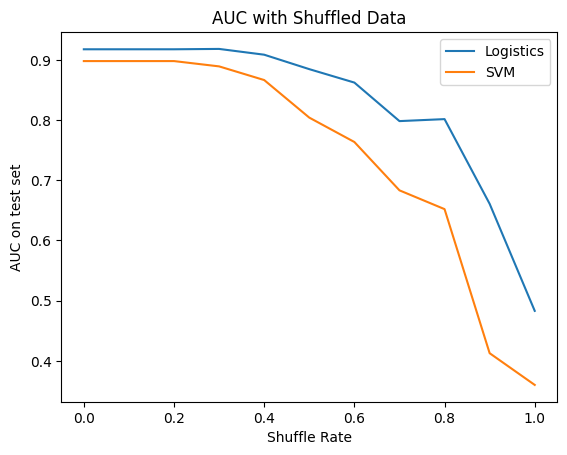

In [14]:
auc_logistics = [0.9176,0.9176,0.9176,0.9182,0.9086,0.8846,0.8623,0.7983,0.8016,0.6609,0.4831]
auc_svm = [0.8980, 0.8980, 0.8980, 0.8892, 0.8665, 0.8041, 0.7636, 0.6833, 0.6521, 0.4128, 0.3601]
plt.plot(np.linspace(0,1,11), auc_logistics, label='Logistics')
plt.plot(np.linspace(0,1,11), auc_svm, label='SVM')
plt.legend()
plt.xlabel('Shuffle Rate')
plt.ylabel('AUC on test set')
plt.title("AUC with Shuffled Data")
plt.savefig("../saved/shuffle.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [9]:
def exp_svm_shuffle(seed,C,rate=0.1):
    # df0 = pd.read_csv('../data/TBI PUD 10-08-2013.csv')
    # df = clean_data(df0)
    np.random.seed(seed)
    # col = np.array(col)
    # y = df['PosIntFinal'].values
    # X = df[col].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    idx = np.random.choice(range(X_train.shape[0]), int(X_train.shape[0]*rate),replace=False)
    y_train[idx] = np.random.permutation(y_train[idx])

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)
    model = SVC(kernel='rbf', C=C, gamma='scale', probability=True, class_weight={0:1, 1:100})
    model.fit(X_train, y_train)
    print(f"rate={rate:.1f}, AUC on val: {roc_auc_score(y_val,model.predict_proba(X_val)[:,1]): .4f}, AUC on test: {roc_auc_score(y_test,model.predict_proba(X_test)[:,1]): .4f}")
    # return model


In [10]:
for r in np.linspace(0,1,11):
    exp_svm_shuffle(1,0.1,r)

rate=0.0, AUC on val:  0.9047, AUC on test:  0.8980
rate=0.1, AUC on val:  0.6628, AUC on test:  0.8980
rate=0.2, AUC on val:  0.5149, AUC on test:  0.8980
rate=0.3, AUC on val:  0.5242, AUC on test:  0.8892
rate=0.4, AUC on val:  0.4921, AUC on test:  0.8665
rate=0.5, AUC on val:  0.5026, AUC on test:  0.8041
rate=0.6, AUC on val:  0.5478, AUC on test:  0.7636
rate=0.7, AUC on val:  0.4645, AUC on test:  0.6833
rate=0.8, AUC on val:  0.4687, AUC on test:  0.6521
rate=0.9, AUC on val:  0.5226, AUC on test:  0.4128
rate=1.0, AUC on val:  0.5430, AUC on test:  0.3601


In [6]:
seed = 123
rate = 0
C = 10
np.random.seed(seed)
col = np.array(X_col)
y = df['PosIntFinal'].values
X = df[col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)
model = SVC(kernel='rbf', C=C, gamma='scale', probability=True, class_weight={0:1, 1:100})
model.fit(X_train, y_train)
print(f"C={C}, AUC on val: {roc_auc_score(y_val,model.predict_proba(X_val)[:,1]): .4f}, AUC on test: {roc_auc_score(y_test,model.predict_proba(X_test)[:,1]): .4f}")

C=10, AUC on val:  0.8741, AUC on test:  0.8674


In [8]:
X_train.shape, y_train.shape

((25446, 104), (25446,))

In [ ]:
for r in np.linspace(0,1,11):
    exp_svm_shuffle(X_col,123,0.01,r)

In [52]:
df0 = pd.read_csv('../data/TBI PUD 10-08-2013.csv')
df = clean_data(df0)
seed=123

np.random.seed(seed)
col = np.array(X_col)
rate = 0
y = df['PosIntFinal'].values
X = df[col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
tmp = y_train.copy()
idx = np.random.choice(range(X_train.shape[0]), int(X_train.shape[0]*rate),replace=False)
y_train[idx] = np.random.permutation(y_train[idx])
print((tmp==y_train).mean())
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)
model = SVC(kernel='rbf', C=C, gamma='scale', probability=True, class_weight={0:1, 1:100})
model.fit(X_train, y_train)
print(f"rate={rate:.1f}, AUC on val: {roc_auc_score(y_val,model.predict_proba(X_val)[:,1]): .4f}, AUC on test: {roc_auc_score(y_test,model.predict_proba(X_test)[:,1]): .4f}")


1.0
